In [13]:
import h5py
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import binned_statistic_2d
from scipy.interpolate import make_splprep

In [46]:
file_ns = range(9)

gampix_energies = np.empty(0)
gampix_naive = np.empty(0)
gampix_detailed = np.empty(0)

edep_energies = np.empty(0)
edep_naive = np.empty(0)
edep_detailed = np.empty(0)


for n in file_ns:
    gampix = np.load(f'/sdf/data/neutrino/summer25/seohyeon/gampix_estimators/muon1k_0-1gev_estimators_gampix_run{n}.npz')
    edep = np.load(f'/sdf/data/neutrino/summer25/seohyeon/edep_estimators/muon1k_0-1gev_estimators_edep_run{n}.npz')


    gampix_energies = np.append(gampix_energies, gampix['energies'])
    gampix_naive = np.append(gampix_naive, gampix['naive'])
    gampix_detailed = np.append(gampix_detailed, gampix['detailed'])
    gampix_evs = gampix['evs']
    
    
    temp_edep_naive = edep['naive'][gampix_evs]
    edep_naive = np.append(edep_naive, temp_edep_naive / 10)
    temp_edep_detailed = edep['detailed'][gampix_evs]
    edep_detailed = np.append(edep_detailed, temp_edep_detailed / 10)


# -------------
# n=9
# gampix = np.load(f'/sdf/data/neutrino/summer25/seohyeon/gampix_estimators/muon1k_0-1gev_estimators_gampix_run{n}.npz')
# edep = np.load(f'/sdf/data/neutrino/summer25/seohyeon/edep_estimators/muon1k_0-1gev_estimators_edep_run{n}.npz')


# gampix_energies = np.append(gampix_energies, gampix['energies'])
# gampix_naive = np.append(gampix_naive, gampix['naive'])
# gampix_detailed = np.append(gampix_detailed, gampix['detailed'])
# gampix_evs = gampix['evs']


# temp_edep_naive = edep['naive'][gampix_evs]
# edep_naive = np.append(edep_naive, temp_edep_naive / 10)
# temp_edep_detailed = edep['detailed'][gampix_evs]
# edep_detailed = np.append(edep_detailed, temp_edep_detailed / 10)

# print(len(edep_naive))
# print(len(gampix_naive))

Text(0.5, 1.0, 'detailed length comparison, 9k evs')

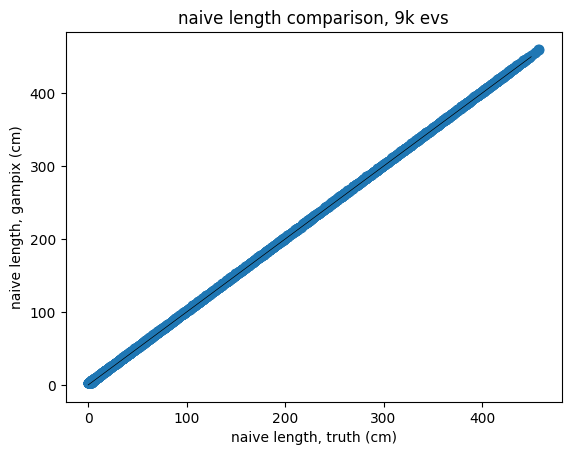

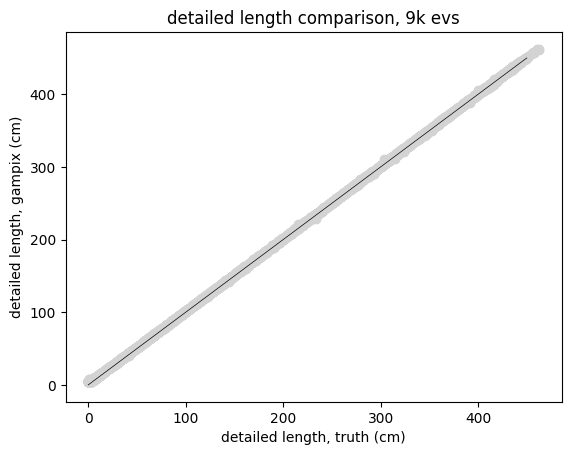

In [48]:
x = np.linspace(0, 450, 100)

plt.figure()
plt.plot(edep_naive, gampix_naive, 'o')
plt.plot(x, x, color='black', linewidth=0.5)
plt.xlabel('naive length, truth (cm)')
plt.ylabel('naive length, gampix (cm)')
plt.title(f'naive length comparison, 9k evs')

plt.figure()
plt.plot(edep_detailed, gampix_detailed, 'o', color='lightgray')
plt.plot(x, x, color='black', linewidth = 0.5)
plt.xlabel('detailed length, truth (cm)')
plt.ylabel('detailed length, gampix (cm)')
plt.title('detailed length comparison, 9k evs')